Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [8]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [9]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [10]:
Y = data['affair']

In [11]:
model = LogisticRegression()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [13]:
model.fit(X_train, Y_train)

LogisticRegression()

In [14]:
predictions = model.predict_proba(X_test)
predictions

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037],
       ...,
       [0.54059867, 0.45940133],
       [0.79790212, 0.20209788],
       [0.77284695, 0.22715305]])

In [15]:
model.score(X_test, Y_test)

0.7319371727748691

In [16]:
# Обернула ручной подсчет базовых метрик в функцию, добавила зависимость от порога
def metrics(predict, target, threshold):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    predicted = [1 if x > threshold else 0 for x in predict[:, 1]]
    
    for pred, actual in zip(predicted, target):    
        if pred == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    
    return tp, fp, fn, tn

In [17]:
#Отдельные функции для каждой метрики
def accuracy(predict, target, threshold):
    tp, fp, fn, tn = metrics(predict, target, threshold)
    return((tp + tn) / len(target))

In [18]:
def precision(predict, target, threshold):
    tp, fp, fn, tn = metrics(predict, target, threshold)
    return tp / (tp + fp)

In [19]:
def recall(predict, target, threshold):
    tp, fp, fn, tn = metrics(predict, target, threshold)
    return tp / (tp + fn)

In [20]:
def true_positive_rate(predict, target, threshold):
    tp, fp, fn, tn = metrics(predict, target, threshold)
    return tp / (tp + fn)

In [21]:
def false_positive_rate(predict, target, threshold):
    tp, fp, fn, tn = metrics(predict, target, threshold)
    return fp / (tn + fp)

In [22]:
#Проверка работы функций
for threshold in map(lambda x : x / 10, range(10)):
    print(f'threshold: {threshold}')
    print(f'accuracy: {accuracy(predictions, Y_test, threshold)}')
    print(f'precision: {precision(predictions, Y_test, threshold)}')
    print(f'recall: {recall(predictions, Y_test, threshold)}')
    print(f'true_positive_rate: {true_positive_rate(predictions, Y_test, threshold)}')
    print(f'false_positive_rate: {false_positive_rate(predictions, Y_test, threshold)}')
    print()

threshold: 0.0
accuracy: 0.31780104712041884
precision: 0.31780104712041884
recall: 1.0
true_positive_rate: 1.0
false_positive_rate: 1.0

threshold: 0.1
accuracy: 0.37225130890052355
precision: 0.33482142857142855
recall: 0.9884678747940692
true_positive_rate: 0.9884678747940692
false_positive_rate: 0.9148119723714505

threshold: 0.2
accuracy: 0.5486910994764398
precision: 0.4036281179138322
recall: 0.8797364085667215
true_positive_rate: 0.8797364085667215
false_positive_rate: 0.6055257099002302

threshold: 0.3
accuracy: 0.6727748691099477
precision: 0.48963133640552997
recall: 0.700164744645799
true_positive_rate: 0.700164744645799
false_positive_rate: 0.3399846508058327

threshold: 0.4
accuracy: 0.7167539267015707
precision: 0.5572916666666666
recall: 0.528830313014827
true_positive_rate: 0.528830313014827
false_positive_rate: 0.19570222563315426

threshold: 0.5
accuracy: 0.7319371727748691
precision: 0.6330532212885154
recall: 0.3723228995057661
true_positive_rate: 0.372322899505766

In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [25]:
for line in zip( pr, re, thres ):
    print( line )

(0.32338838572189665, 1.0, 0.07582923261811497)
(0.3230277185501066, 0.9983525535420099, 0.07617596154389374)
(0.3232, 0.9983525535420099, 0.07800501650393218)
(0.3233724653148346, 0.9983525535420099, 0.07833731232250689)
(0.32354511478910836, 0.9983525535420099, 0.07858652832285444)
(0.32371794871794873, 0.9983525535420099, 0.07969132525379617)
(0.3238909673971138, 0.9983525535420099, 0.0798710657943024)
(0.3240641711229946, 0.9983525535420099, 0.08031367556252261)
(0.32423756019261635, 0.9983525535420099, 0.08053860817983043)
(0.3238758029978587, 0.9967051070840197, 0.08068797229011423)
(0.32404927691483665, 0.9967051070840197, 0.08099233386084428)
(0.3236870310825295, 0.9950576606260296, 0.08121210580829259)
(0.32386058981233246, 0.9950576606260296, 0.08256996910534539)
(0.3240343347639485, 0.9950576606260296, 0.0829337357281132)
(0.32420826623725174, 0.9950576606260296, 0.08296584587585257)
(0.32438238453276047, 0.9950576606260296, 0.08327802141469197)
(0.3247311827956989, 0.995057

In [26]:
from sklearn.metrics import average_precision_score

In [27]:
average_precision_score( Y_test, predictions[:, 1] )

0.5761329928884336

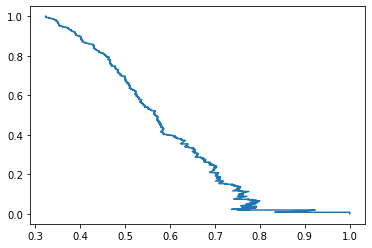

In [28]:
#Строю график по автоматическим данным
plt.plot(pr,re)

In [29]:
#Строю график с помощью своих функций
def homemade_pr_rec_curve(predict, target):
    pr = []
    rec = []
    thres = []
    
    for threshold in np.linspace(0, 1, 2000): 
        try:
            pr.append(precision(predict, target, threshold))
        except ZeroDivisionError:
            pr.append(1.0)
        rec.append(recall(predict, target, threshold))
        thres.append(threshold)
    
    return pr, rec, thres

In [41]:
precisions, recalls, thresholds = homemade_pr_rec_curve(predictions, Y_test)

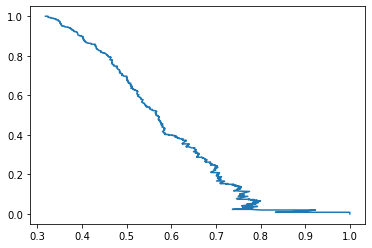

In [31]:
# График очень похож на тот, что выше
plt.plot(precisions, recalls)

In [32]:
from sklearn.metrics import roc_curve

In [33]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr, tpr

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.67459708e-04,
        7.67459708e-04, 3.06983883e-03, 3.06983883e-03, 3.83729854e-03,
        3.83729854e-03, 4.60475825e-03, 4.60475825e-03, 5.37221796e-03,
        5.37221796e-03, 6.13967767e-03, 6.13967767e-03, 6.90713738e-03,
        6.90713738e-03, 7.67459708e-03, 7.67459708e-03, 8.44205679e-03,
        8.44205679e-03, 9.20951650e-03, 9.20951650e-03, 9.97697621e-03,
        9.97697621e-03, 1.15118956e-02, 1.15118956e-02, 1.22793553e-02,
        1.22793553e-02, 1.38142748e-02, 1.38142748e-02, 1.45817345e-02,
        1.45817345e-02, 1.53491942e-02, 1.53491942e-02, 1.68841136e-02,
        1.68841136e-02, 1.76515733e-02, 1.76515733e-02, 1.91864927e-02,
        1.91864927e-02, 1.91864927e-02, 1.91864927e-02, 1.99539524e-02,
        1.99539524e-02, 2.07214121e-02, 2.07214121e-02, 2.14888718e-02,
        2.14888718e-02, 2.22563315e-02, 2.22563315e-02, 2.30237913e-02,
        2.30237913e-02, 2.37912510e-02, 2.37912510e-02, 2.455871

In [34]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9292091225540635)
(0.0, 0.0016474464579901153, 0.9292091225540636)
(0.0, 0.008237232289950576, 0.8999886293550295)
(0.0007674597083653108, 0.008237232289950576, 0.8977304731763326)
(0.0007674597083653108, 0.019769357495881382, 0.8650840080118303)
(0.0030698388334612432, 0.019769357495881382, 0.8547129960576282)
(0.0030698388334612432, 0.023064250411861616, 0.8544826985294759)
(0.003837298541826554, 0.023064250411861616, 0.8521926955323478)
(0.003837298541826554, 0.03130148270181219, 0.8338303386602237)
(0.004604758250191865, 0.03130148270181219, 0.833607319198845)
(0.004604758250191865, 0.03789126853377265, 0.8248957637897657)
(0.005372217958557176, 0.03789126853377265, 0.8231501892615314)
(0.005372217958557176, 0.04118616144975288, 0.8191949435503456)
(0.0061396776669224865, 0.04118616144975288, 0.8186308257538518)
(0.0061396776669224865, 0.04942339373970346, 0.8087952645555928)
(0.006907137375287797, 0.04942339373970346, 0.8081343457931217)
(0.006907137375287797, 0.05766

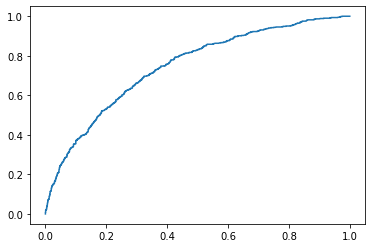

In [35]:
plt.plot( fpr, tpr )

In [36]:
#Строю roc-кривую с помощью своих функций
def homemade_roc_curve(predict, target):
    fpr = []
    tpr = []
    thres = []
    
    for threshold in np.linspace(0, 1, 2000): 
        fpr.append(false_positive_rate(predict, target, threshold))
        tpr.append(true_positive_rate(predict, target, threshold))
        thres.append(threshold)
    
    return fpr, tpr, thres

In [50]:
fpr, tpr, thres = homemade_roc_curve(predictions, Y_test)

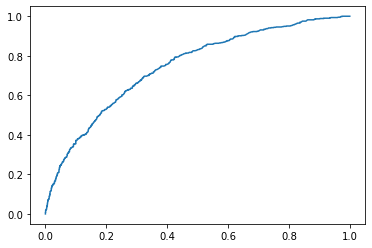

In [51]:
plt.plot(fpr, tpr)

In [52]:
from sklearn.metrics import roc_curve

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7451629176618145

In [55]:
from sklearn.metrics import auc

In [56]:
auc( fpr, tpr )

0.7451635498362037